In [35]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import pandas as pd
import seaborn as sns
import pickle
import random

In [36]:
df = pd.read_csv("./GTSRB.csv")

In [37]:
def train_validate_test_split(df, train_percent=.7, validate_percent=.1, seed=None):
    np.random.seed(seed)
    perm = np.random.permutation(df.index)
    m = len(df.index)
    train_end = int(train_percent * m)
    validate_end = int(validate_percent * m) + train_end
    train = df.iloc[perm[:train_end]]
    validate = df.iloc[perm[train_end:validate_end]]
    test = df.iloc[perm[validate_end:]]
    return train, validate, test

In [38]:
np.random.seed([3,1415])
df = pd.DataFrame(np.random.rand(10, 5), columns=list('ABCDE'))

In [39]:
train, validate, test = train_validate_test_split(df)
test.to_csv('test.p')
train.to_csv('train.p')
validate.to_csv('valid.p')

In [40]:
with open("./traffic-signs-data/train.p", mode='rb') as training_data:
    train = pickle.load(training_data)
with open("./traffic-signs-data/valid.p", mode='rb') as validation_data:
    valid = pickle.load(validation_data)
with open("./traffic-signs-data/test.p", mode='rb') as testing_data:
    test = pickle.load(testing_data)

In [44]:
X_train, y_train = train['features'], train['labels']
X_validation, y_validation = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

In [45]:
X_train.shape

(34799, 32, 32, 3)

In [46]:
y_train.shape

(34799,)

5

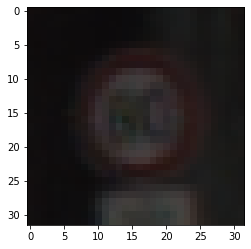

In [47]:
i = np.random.randint(1, len(X_train))
plt.imshow(X_train[i])
y_train[i]

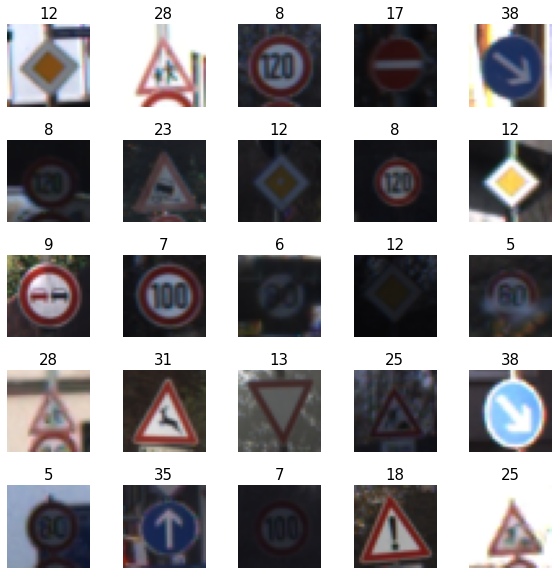

In [48]:
 W_grid = 5
L_grid = 5

fig, axes = plt.subplots(L_grid, W_grid, figsize = (10,10))

axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array

n_training = len(X_train) # get the length of the training dataset

for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables 

    index = np.random.randint(0, n_training)   
    axes[i].imshow( X_train[index])
    axes[i].set_title(y_train[index], fontsize = 15)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

        

In [49]:
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

In [9]:
X_train_gray = np.sum(X_train/3, axis = 3, keepdims = True)
X_test_gray = np.sum(X_test/3, axis = 3, keepdims = True)
X_validation_gray = np.sum(X_validation/3, axis = 3, keepdims = True)

In [10]:
X_train_gray.shape


(34799, 32, 32, 1)

In [11]:
X_test_gray.shape


(12630, 32, 32, 1)

In [14]:
X_validation_gray.shape

(4410, 32, 32, 1)

In [15]:
X_train_gray_norm = (X_train_gray - 128)/128
X_test_gray_norm = (X_test_gray - 128)/128
X_validation_gray_norm = (X_validation_gray - 128)/128

In [16]:
X_train_gray_norm

array([[[[-0.80208333],
         [-0.8125    ],
         [-0.8046875 ],
         ...,
         [-0.77864583],
         [-0.77604167],
         [-0.7734375 ]],

        [[-0.8046875 ],
         [-0.8046875 ],
         [-0.79947917],
         ...,
         [-0.78385417],
         [-0.78125   ],
         [-0.76822917]],

        [[-0.80729167],
         [-0.80729167],
         [-0.80729167],
         ...,
         [-0.78645833],
         [-0.78125   ],
         [-0.76822917]],

        ...,

        [[-0.80208333],
         [-0.7890625 ],
         [-0.7890625 ],
         ...,
         [-0.80989583],
         [-0.80989583],
         [-0.80729167]],

        [[-0.80989583],
         [-0.796875  ],
         [-0.7890625 ],
         ...,
         [-0.81770833],
         [-0.80989583],
         [-0.80208333]],

        [[-0.8046875 ],
         [-0.80729167],
         [-0.8046875 ],
         ...,
         [-0.8125    ],
         [-0.80729167],
         [-0.79166667]]],


       [[[-0.01041667],


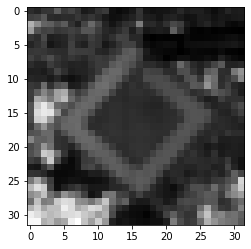

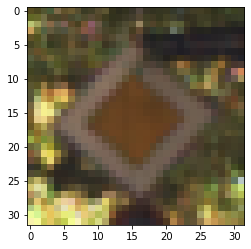

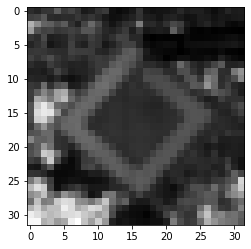

In [17]:
i = random.randint(1, len(X_train_gray))
plt.imshow(X_train_gray[i].squeeze(), cmap = 'gray')
plt.figure()
plt.imshow(X_train[i])
plt.figure()
plt.imshow(X_train_gray_norm[i].squeeze(), cmap = 'gray')

In [18]:
from tensorflow.keras import datasets, layers, models

CNN = models.Sequential()

CNN.add(layers.Conv2D(6, (5,5), activation = 'relu', input_shape = (32,32,1)))
CNN.add(layers.AveragePooling2D())

CNN.add(layers.Conv2D(16, (5,5), activation = 'relu'))
CNN.add(layers.AveragePooling2D())

CNN.add(layers.Flatten())

CNN.add(layers.Dense(120, activation = 'relu'))

CNN.add(layers.Dense(84, activation = 'relu'))

CNN.add(layers.Dense(43, activation = 'softmax'))
CNN.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d (AveragePo (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               48120     
_________________________________________________________________
dense_1 (Dense)              (None, 84)                1

In [19]:
CNN.compile(optimizer = 'Adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [21]:
history = CNN.fit(X_train_gray_norm,
                 y_train, 
                 batch_size = 500,
                 epochs = 15,
                 verbose = 1,
                 validation_data = (X_validation_gray_norm, y_validation))

Epoch 1/15
70/70 [==============================] - 19s 265ms/step - loss: 3.1457 - accuracy: 0.1914 - val_loss: 2.5666 - val_accuracy: 0.3431
Epoch 2/15
70/70 [==============================] - 18s 260ms/step - loss: 1.5071 - accuracy: 0.5780 - val_loss: 1.2124 - val_accuracy: 0.6463
Epoch 3/15
70/70 [==============================] - 18s 263ms/step - loss: 0.8023 - accuracy: 0.7777 - val_loss: 0.8440 - val_accuracy: 0.7483
Epoch 4/15
70/70 [==============================] - 19s 278ms/step - loss: 0.5726 - accuracy: 0.8440 - val_loss: 0.7456 - val_accuracy: 0.7769
Epoch 5/15
70/70 [==============================] - 19s 274ms/step - loss: 0.4542 - accuracy: 0.8783 - val_loss: 0.6638 - val_accuracy: 0.7986
Epoch 6/15
70/70 [==============================] - 19s 269ms/step - loss: 0.3737 - accuracy: 0.9026 - val_loss: 0.5706 - val_accuracy: 0.8358
Epoch 7/15
70/70 [==============================] - 19s 274ms/step - loss: 0.3150 - accuracy: 0.9205 - val_loss: 0.5644 - val_accuracy: 0.8385

In [22]:
score = CNN.evaluate(X_test_gray_norm, y_test)
print('Test Accuracy: {}'.format(score[1]))

395/395 [==============================] - 4s 10ms/step - loss: 0.8449 - accuracy: 0.8504
Test Accuracy: 0.8504354953765869


In [23]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [24]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

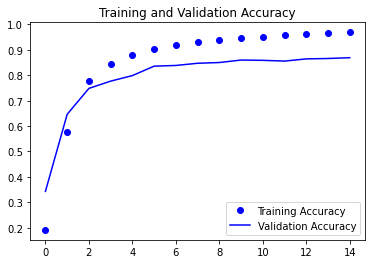

In [25]:
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

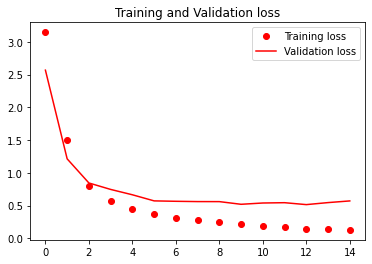

In [26]:
plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

In [27]:
predicted_classes = CNN.predict_classes(X_test_gray_norm)
y_true = y_test

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


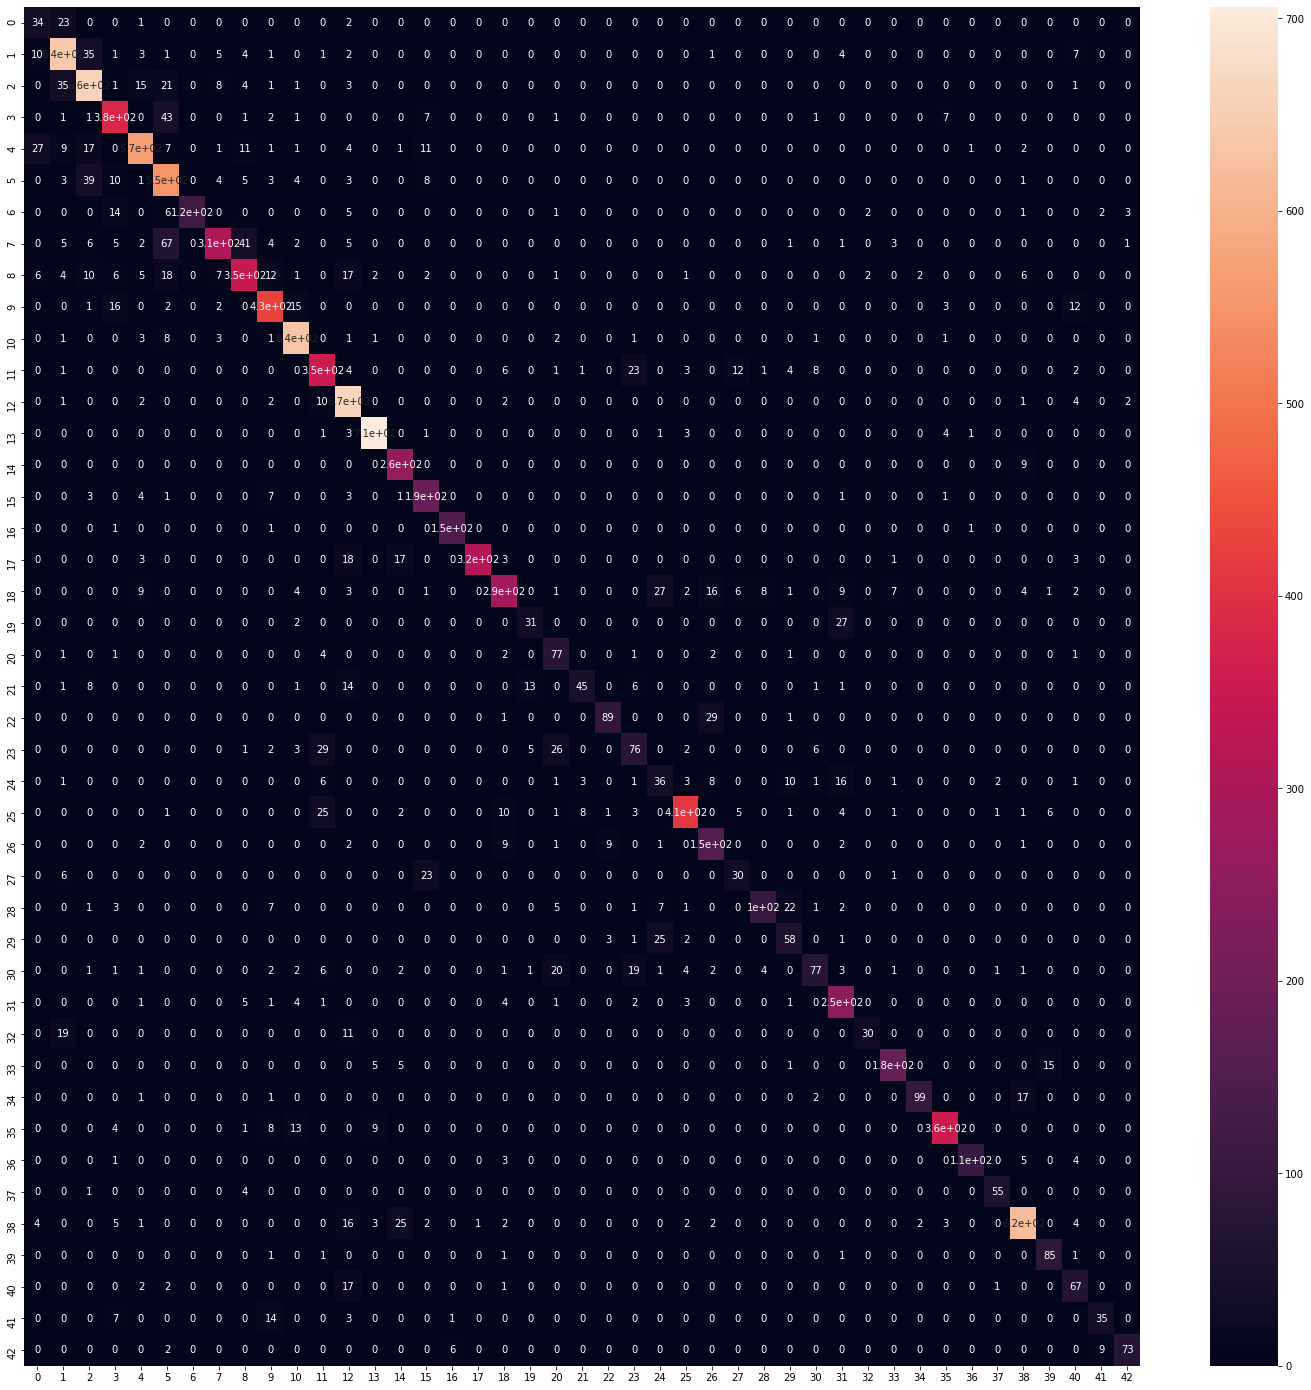

In [28]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, predicted_classes)
plt.figure(figsize = (25, 25))
sns.heatmap(cm, annot = True)

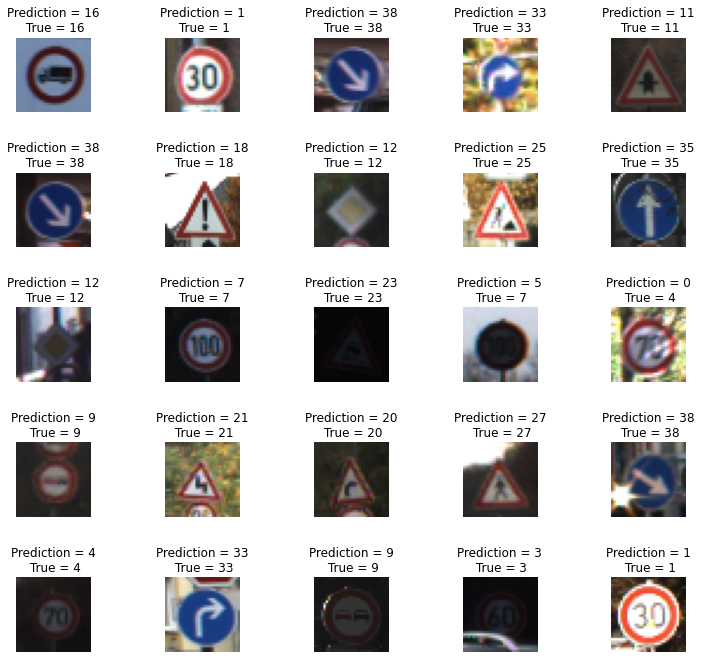

In [29]:
L = 5
W = 5

fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(predicted_classes[i], y_true[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1)    

In [30]:
CNN.save('traffic_classifier.h5')